In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from termcolor import cprint
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [28]:
data = pd.read_csv("tweets.csv")

In [29]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


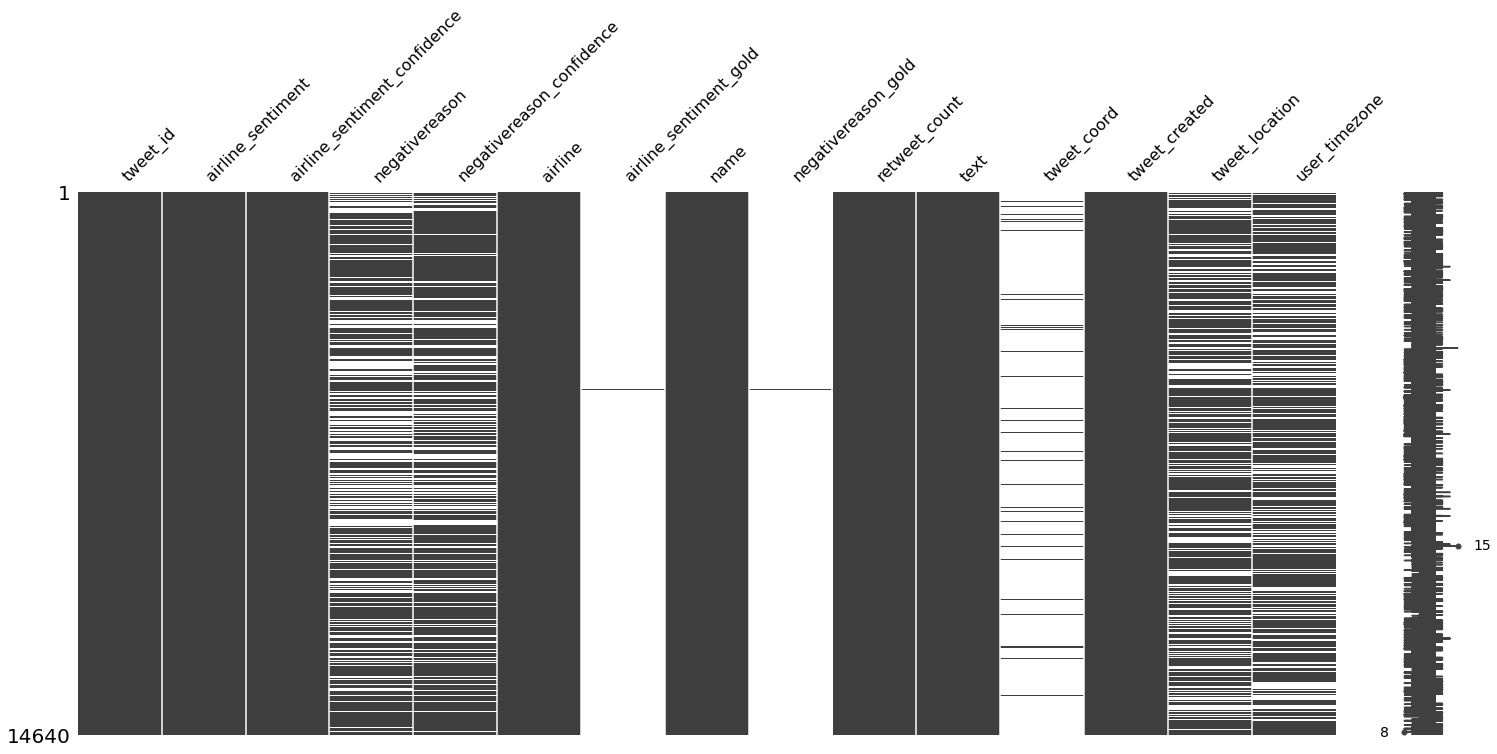

In [30]:
import missingno
missingno.matrix(data)

In [31]:
data.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [32]:
data.shape

(14640, 15)

In [33]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

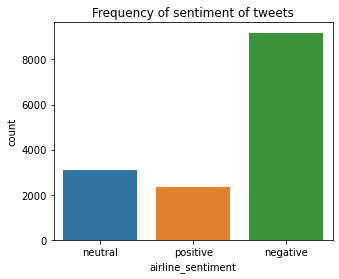

In [34]:
plt.figure(figsize = (5,4))
ax = sns.countplot(x = 'airline_sentiment', data = data)
ax.set_title(label = "Frequency of sentiment of tweets")
plt.show()

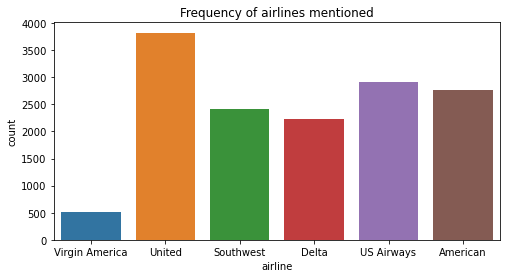

In [35]:
plt.figure(figsize = (8,4))
ax = sns.countplot(x = 'airline', data = data)
ax.set_title(label = "Frequency of airlines mentioned")
plt.show()

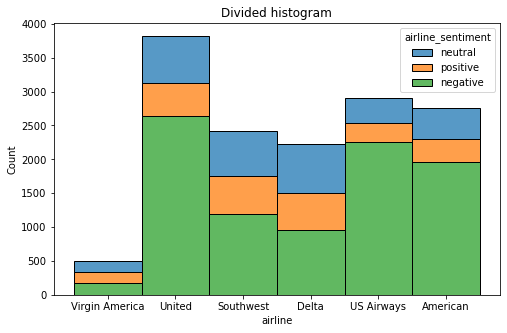

In [36]:
plt.figure(figsize = (8,5))
ax = sns.histplot(data=data, x="airline", hue="airline_sentiment", multiple='stack')
ax.set_title(label = "Divided histogram")
plt.show()

In [37]:
sentiments= list(data['airline_sentiment'].unique())
airlines = list(data['airline'].unique())

airlines_and_sentiments_dict = dict()

for airline in airlines:
    temp = dict()
    for sentiment in sentiments:
        count = data[(data['airline'] == airline) & (data['airline_sentiment'] == sentiment)].shape[0]
        temp[sentiment] = count
        
    total = 0
    for key in temp:
        total+= temp[key]
    
    airlines_and_sentiments_dict[airline] = temp
    
    print("Ratio of Neutral: Positive: Negative: Total = "+str(round(temp['neutral']/total,3))+" :"+str(round(temp['positive']/total, 3))+" :"+str(round(temp['negative']/total,3))+" :"+str("1"))

Ratio of Neutral: Positive: Negative: Total = 0.339 :0.302 :0.359 :1
Ratio of Neutral: Positive: Negative: Total = 0.182 :0.129 :0.689 :1
Ratio of Neutral: Positive: Negative: Total = 0.274 :0.236 :0.49 :1
Ratio of Neutral: Positive: Negative: Total = 0.325 :0.245 :0.43 :1
Ratio of Neutral: Positive: Negative: Total = 0.131 :0.092 :0.777 :1
Ratio of Neutral: Positive: Negative: Total = 0.168 :0.122 :0.71 :1


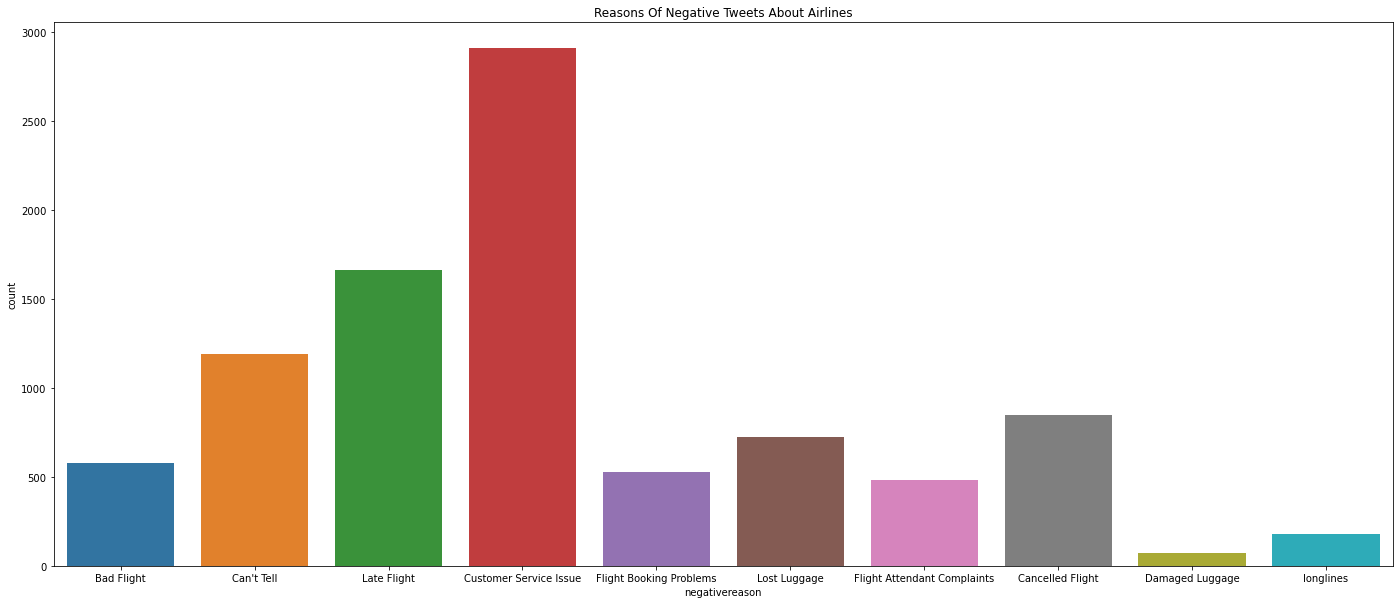

In [38]:
plt.figure(figsize = (24, 10))
sns.countplot(x = 'negativereason', data = data)
plt.title('Reasons Of Negative Tweets About Airlines')
plt.show()

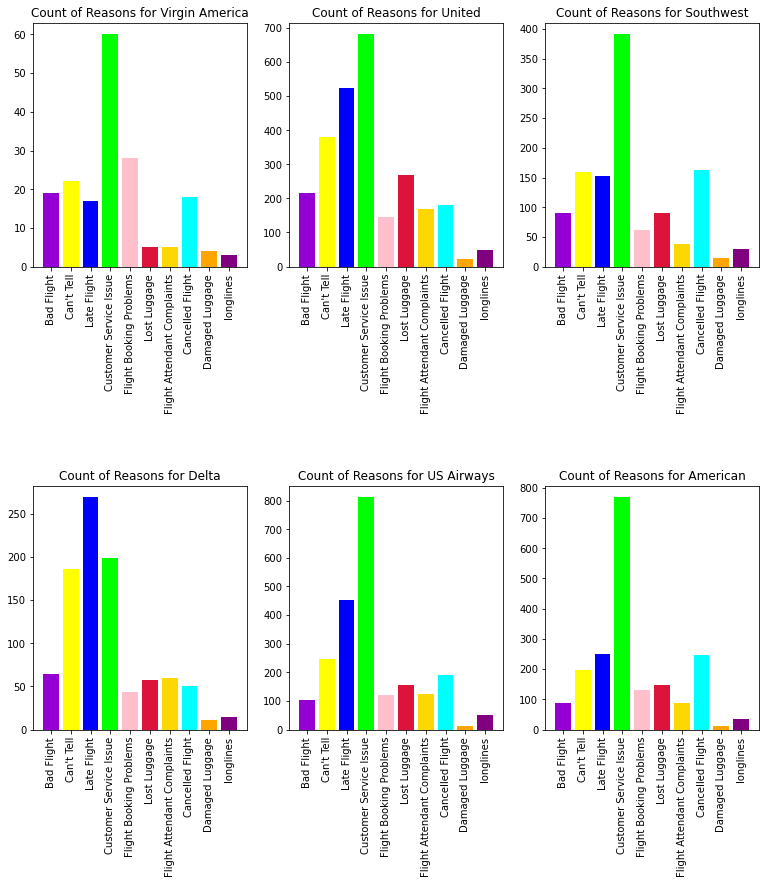

In [40]:
#ref: https://www.kaggle.com/meisamraz/sentiment-analysis-96-acc-eda-text-preprocessing

NR_Count=data['negativereason'].value_counts()
def NCount(Airline):
    airlineName =data[data['airline']==Airline]
    count= airlineName['negativereason'].value_counts()
    Unique_reason= data['negativereason'].unique()
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def plot_reason(airline):
    a= NCount(airline)
    count=a['count']
    Id = range(1,(len(a)+1))
    plt.bar(Id,count, color=['darkviolet','yellow','blue','lime','pink','crimson','gold','cyan','orange','purple'])
    plt.xticks(Id,a['Reasons'],rotation=90)
    plt.title('Count of Reasons for '+ airline)
    
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

In [42]:
positive = data[data['airline_sentiment'] == 'positive'].text
neutral  = data[data['airline_sentiment'] == 'neutral'].text
negative  = data[data['airline_sentiment'] == 'negative'].text

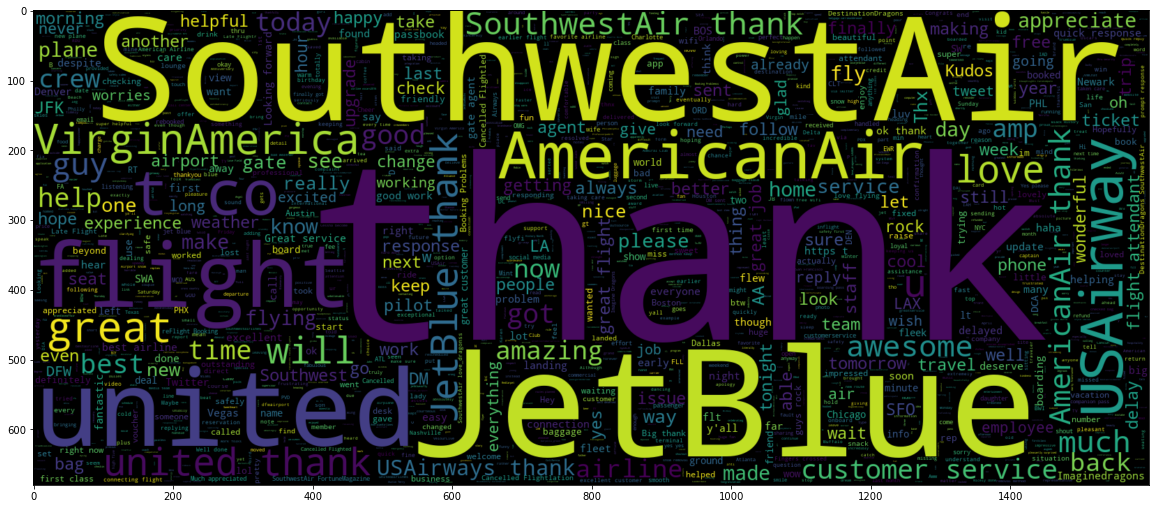

In [43]:
plt.figure(figsize = (20,20)) 
worldcould_pos = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(positive))
plt.imshow(worldcould_pos,interpolation = 'bilinear')
ax.grid(False)

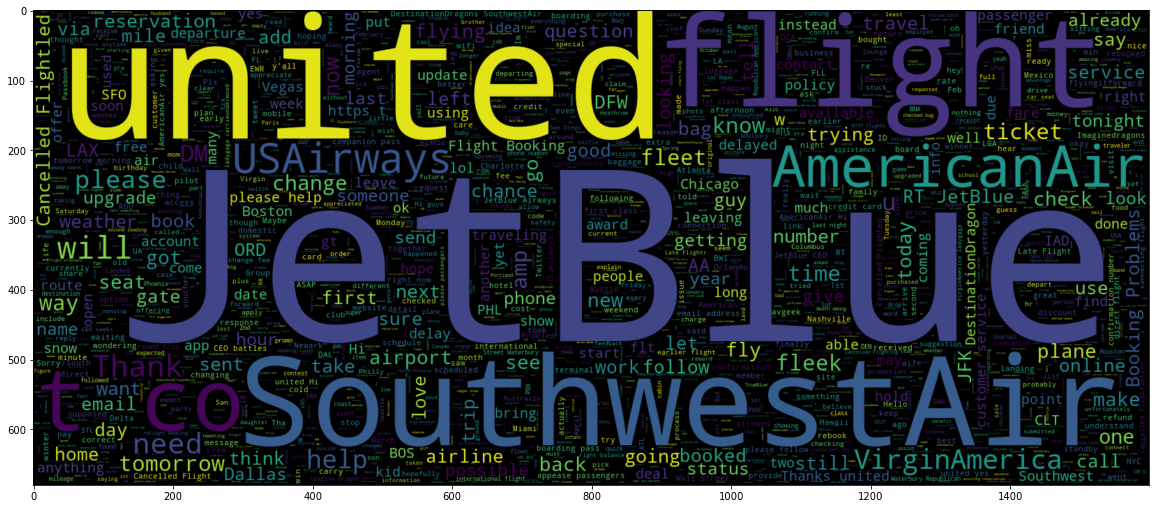

In [44]:
plt.figure(figsize = (20,20)) 
worldcould_neutral = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(neutral))
plt.imshow(worldcould_neutral,interpolation = 'bilinear')
ax.grid(False)

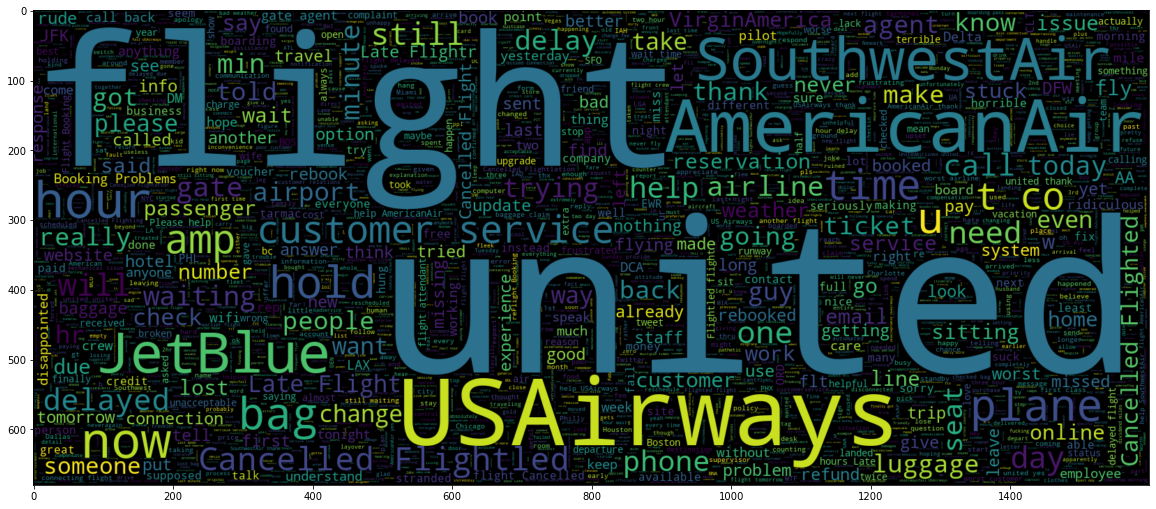

In [45]:
plt.figure(figsize = (20,20)) 
worldcould_neg = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(negative))
plt.imshow(worldcould_neg,interpolation = 'bilinear')
ax.grid(False)